In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [54]:
n = 10 #nb des noeuds
k = 15  #nb des itérations
c = 1/(n+1)

a = 30 #longueur de l'espace
b = 20 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [55]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    
    

def mouvement1(x,y,A):      
    for i in range(n):
        a=0
        b=0
        for j in range(n):
            a += (x[j])*A[i][j]
            b += (y[j])*A[i][j]
        x[i]=a
        y[i]=b
    return x,y


def mouvement(x,y,A):      
    
    X = np.copy(np.array(x))
    Y = np.copy(np.array(y))
    
     
    X = np.dot(A,X)
    Y = np.dot(A,Y)
    
    x = X
    y = Y
    return x,y

In [56]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]


matrice d'adjacence :
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 matrice de communication :
 [[0.         0.         0.         0.25       0.         0.25
  0.         0.25       0.25       0.        ]
 [0.         0.         0.         0.25       0.25       0.
  0.         0.25       0.25       0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.5       ]
 [0.14285714 0.14285714 0.         0.         0.         0.14285714
  0.14285714 0.14285714 0.14285714 0.14285714]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.5        0.        ]
 [0.2        0.         0.         0.2        0.         0.
  0.2        0.2        0.2        0.        ]
 [0.         0.         0.2        0.2        0.         0.2
  

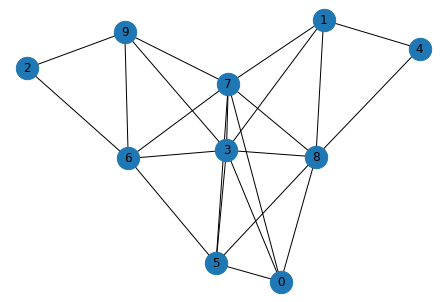

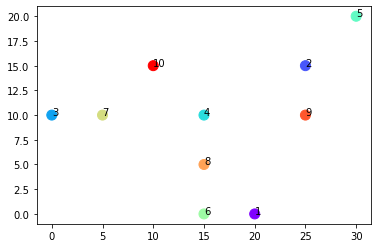

In [57]:
M = positionToAdjMatrix(x,y,r_det)

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))


#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

print(C.sum(axis=0))

show_graph_with_labels(a)

colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


 matrice adjacence 
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 laplacienne 
 [[ 4.  0.  0. -1.  0. -1.  0. -1. -1.  0.]
 [ 0.  4.  0. -1. -1.  0.  0. -1. -1.  0.]
 [ 0.  0.  2.  0.  0.  0. -1.  0.  0. -1.]
 [-1. -1.  0.  7.  0. -1. -1. -1. -1. -1.]
 [ 0. -1.  0.  0.  2.  0.  0.  0. -1.  0.]
 [-1.  0.  0. -1.  0.  5. -1. -1. -1.  0.]
 [ 0.  0. -1. -1.  0. -1.  5. -1.  0. -1.]
 [-1. -1.  0. -1.  0. -1. -1.  7. -1. -1.]
 [-1. -1.  0. -1. -1. -1.  0. -1.  6.  0.]
 [ 0.  0. -1. -1.  0.  0. -1. -1.  0.  4.]]


 matrice de priorité 
 [[0.16865422 0.13772628 0.07953094 0.13451571 0.02038331 0.11028342
  0.02470538 0.1628034  0.08993488 0.07146247]
 [0.04762994 0.13939113 0.08212419 0.10233945 0.00338287 0.11119758
  0.11020021 0.11107128 0.16991009 0.12275325]
 [0.0919399  0.11176576 0.17841094 0.0154019

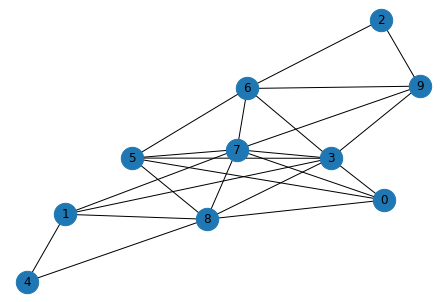

Text(0, 0.5, 'Y axis')

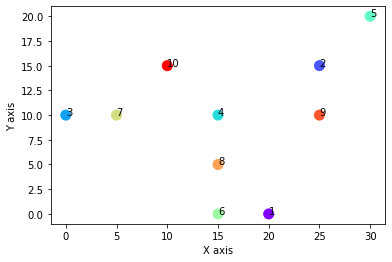

In [58]:

M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
#print("\n\n P \n",P)

#print("\n\n Ppuissance100 \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W
O=W

S = S.sum(axis=0)/n
print("\n\n convergence de W cad Wbar \n",S)


#matrice de communication
A = matriceCom(H,W)
A1 = A
print("\n\n A1 matrice de communication :\n", A1)
print("\n\n A1puissance100 \n",np.linalg.matrix_power(A1,100))

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


plt.xlabel("X axis")

plt.ylabel("Y axis")

In [59]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[-4.44089210e-16  1.16088296e+00  2.03237741e+00  3.90876698e+00
  4.26150922e+00  5.00000000e+00  6.28113763e+00  7.07055190e+00
  8.00000000e+00  8.28477390e+00]


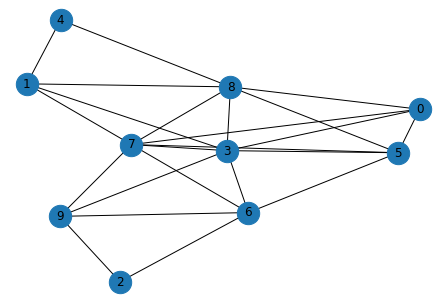

[[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


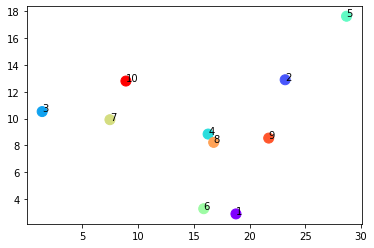

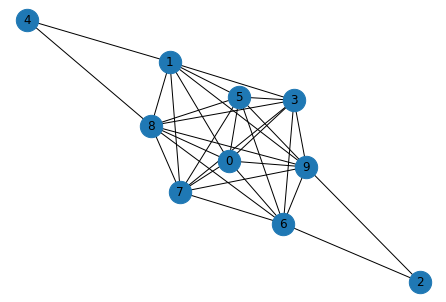

[[0 1 0 1 0 1 1 1 1 1]
 [1 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 1 0 1 0 0 1 1 1 1]
 [1 0 1 1 0 1 0 1 1 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 0 1 1 1 1 0]]


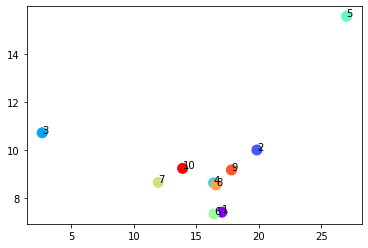

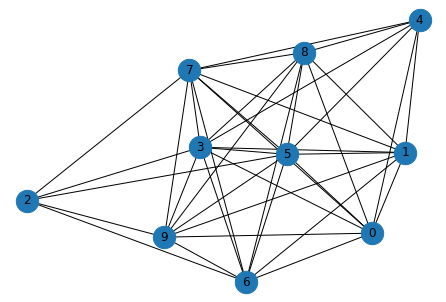

[[0 1 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 0 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 1 0]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 0 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 0 1 1 1 1 0]]


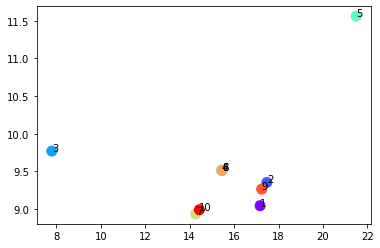

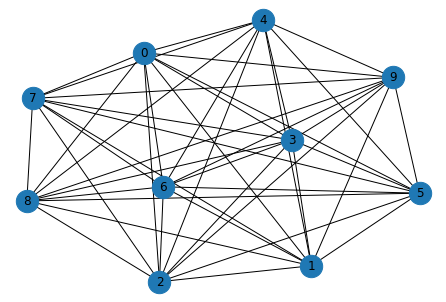

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


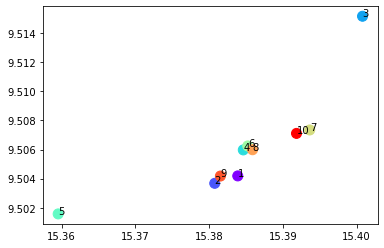

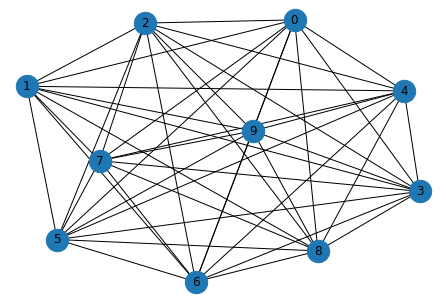

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


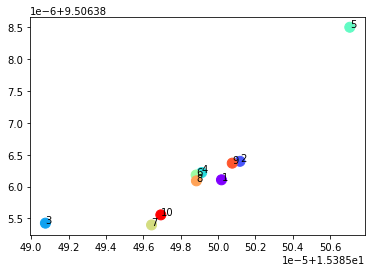

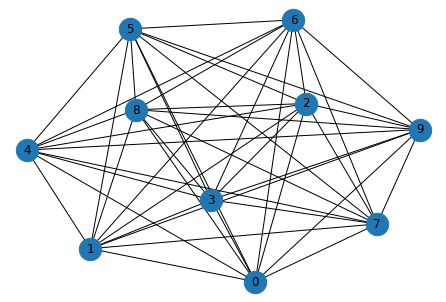

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


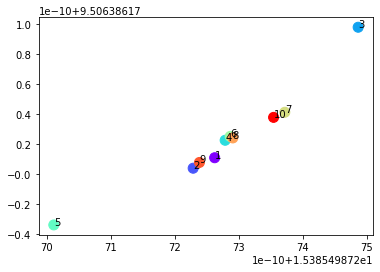

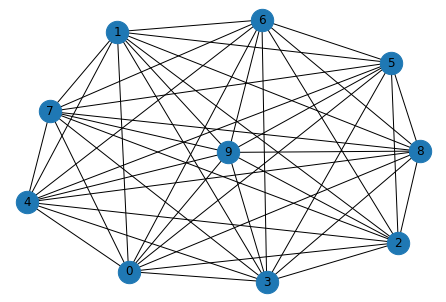

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


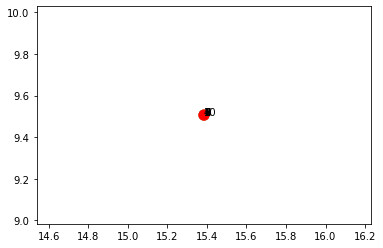

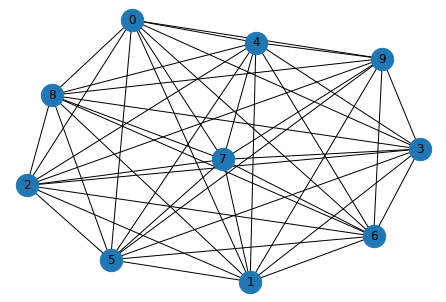

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


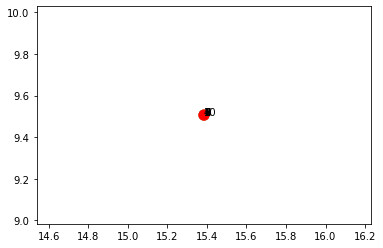

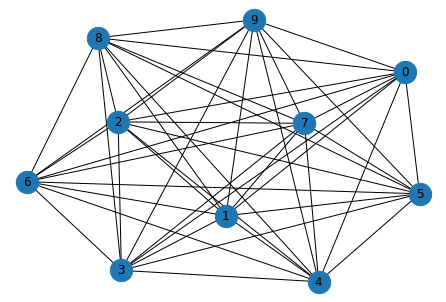

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


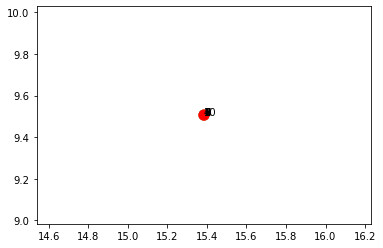

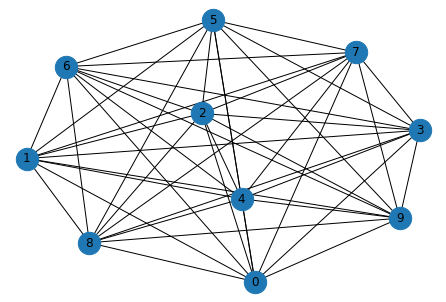

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


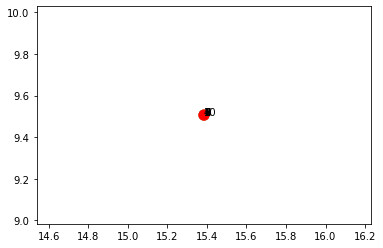

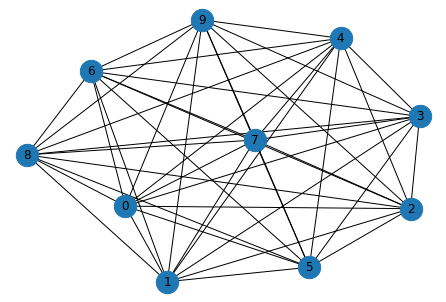

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


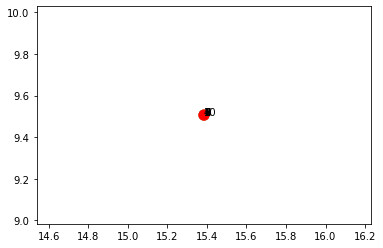

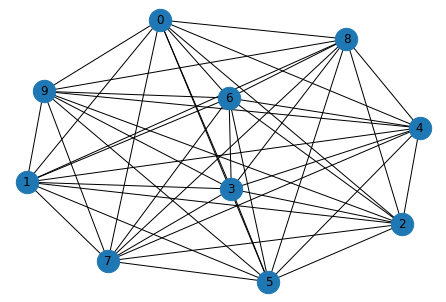

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


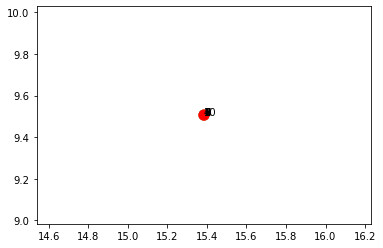

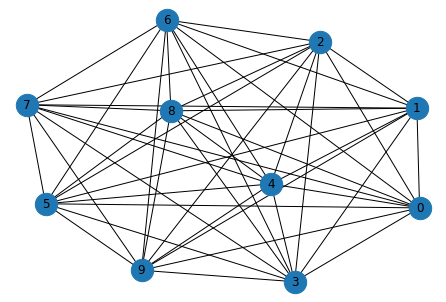

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


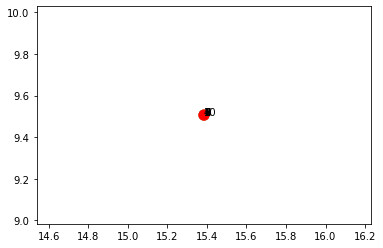

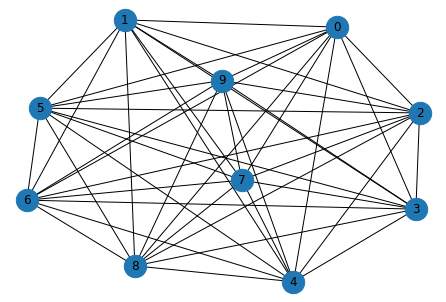

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


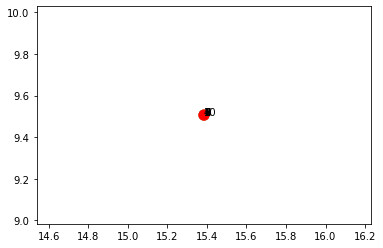

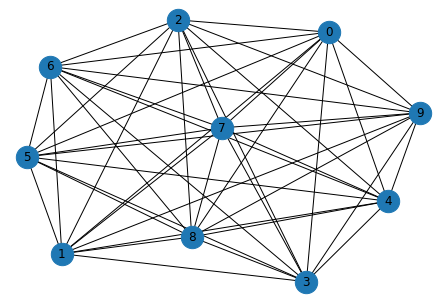

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


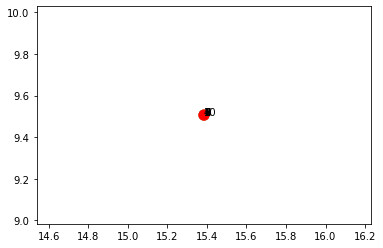

15


 matrice de priorité 
 [[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.0833

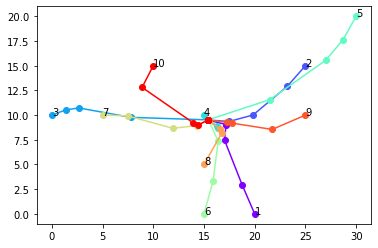

In [60]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []

#AF AF : Afinal & PiA : produit An An-1 .... A1 
AF = [[0 for i in range(n)] for j in range(n)]
PiA = []

X.extend(x)
Y.extend(y)
for t in range(k):
    
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    x,y = mouvement(x,y,A)
    
    PiA.append(A)
    X.extend(x)
    Y.extend(y)
    a = np.array(X).reshape(t+2,n)
    b = np.array(Y).reshape(t+2,n)
    
    show_graph_with_labels(np.array(M))
    print(H)
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    
    
    AF = A
    
    
    plt.pause(1.1)
    camera.snap()
print(len(PiA))

                 
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [87]:
for i in range(len(PiA)):
    print(i,"\n \n matrice A \n \n",PiA[i][1])



0 
 
 matrice A 
 
 [0.         0.62143978 0.         0.10343799 0.02284654 0.
 0.         0.08829361 0.16398209 0.        ]
1 
 
 matrice A 
 
 [0.09650373 0.35752115 0.         0.1057452  0.0561239  0.08125886
 0.         0.07576669 0.1417085  0.08537196]
2 
 
 matrice A 
 
 [0.10469867 0.2318525  0.         0.1068316  0.07193754 0.07656453
 0.12064478 0.06808492 0.13358371 0.08580174]
3 
 
 matrice A 
 
 [0.10463385 0.10767372 0.12626439 0.10115525 0.08234217 0.08107748
 0.11610385 0.0640653  0.12882571 0.08785827]
4 
 
 matrice A 
 
 [0.10462796 0.10766002 0.12646769 0.10063922 0.08328804 0.08148775
 0.11569104 0.06369988 0.12839317 0.08804523]
5 
 
 matrice A 
 
 [0.10462742 0.10765877 0.12648617 0.10059231 0.08337403 0.08152504
 0.11565351 0.06366666 0.12835384 0.08806223]
6 
 
 matrice A 
 
 [0.10462737 0.10765866 0.12648786 0.10058804 0.08338185 0.08152844
 0.1156501  0.06366364 0.12835027 0.08806377]
7 
 
 matrice A 
 
 [0.10462737 0.10765865 0.12648801 0.10058766 0.08338256 0

Text(0, 0.5, 'Y axis')

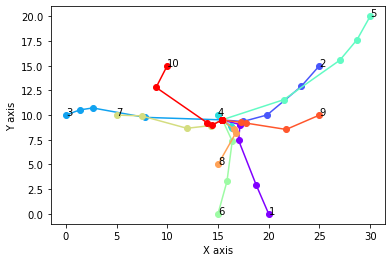

In [61]:
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

plt.xlabel("X axis")

plt.ylabel("Y axis")

In [62]:
print(A1)

[[0.5024626  0.         0.         0.13451571 0.         0.11028342
  0.         0.1628034  0.08993488 0.        ]
 [0.         0.61329631 0.         0.10233945 0.00338287 0.
  0.         0.11107128 0.16991009 0.        ]
 [0.         0.         0.85318241 0.         0.         0.
  0.05380285 0.         0.         0.09301473]
 [0.13953047 0.10732834 0.         0.31794515 0.         0.03947338
  0.15981941 0.06198193 0.11410896 0.05981236]
 [0.         0.03170513 0.         0.         0.7275962  0.
  0.         0.         0.24069867 0.        ]
 [0.21121588 0.         0.         0.13083285 0.         0.50672098
  0.06117337 0.02599946 0.06405746 0.        ]
 [0.         0.         0.01443694 0.15584678 0.         0.05972818
  0.53969992 0.02114212 0.         0.20914606]
 [0.08502069 0.1781206  0.         0.19117568 0.         0.04889069
  0.15653043 0.11777861 0.22123015 0.00125314]
 [0.11665892 0.04647104 0.         0.16560215 0.04281287 0.09916236
  0.         0.0984902  0.43080247 0

In [63]:
print(AF)

[[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976

In [64]:
print(len(PiA),np.array(PiA[len(PiA)-1]))

15 [[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564

In [93]:
def prod1_n(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(produit,np.array(i))
    return produit

def prodn_1(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(np.array(i),produit)
        #print(i,"\n \n matrice A \n \n",produit)
    return produit

def prod2n_1(PiA):
    produit = np.identity(n)
    for i in PiA[:10:-1]:
        produit = np.dot(produit,np.array(i))
    return produit



In [94]:
A1_n = prod1_n(PiA)
An_1 = prodn_1(PiA)

A2n_1 = prod2n_1(PiA)

In [95]:
print(A1_n)

[[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976 0.06366334 0.12834991 0.08806393]
 [0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
  0.11564976

In [68]:
print(An_1)

[[0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919 0.06825862 0.13210153 0.10092218]
 [0.10827262 0.10211529 0.12507813 0.11437198 0.06533614 0.07381433
  0.10972919

In [69]:
print(a)

[[20.         25.          0.         15.         30.         15.
   5.         15.         25.         10.        ]
 [18.77895223 23.19691677  1.38235957 16.27921743 28.7064541  15.88567635
   7.46593578 16.77892781 21.7196554   8.9003005 ]
 [17.03676514 19.8380264   2.66035668 16.37356815 27.0088808  16.40392762
  11.93757231 16.56861432 17.80027317 13.89542626]
 [17.16893799 17.46970565  7.79386924 15.4314874  21.49305928 15.44422348
  14.27048165 15.45598592 17.23941818 14.43600538]
 [15.38388362 15.38076137 15.40080902 15.38463327 15.35952266 15.3852395
  15.3936448  15.38588792 15.38152833 15.3918531 ]
 [15.38550019 15.38550118 15.38549076 15.38549913 15.38550706 15.38549883
  15.38549644 15.38549885 15.38550076 15.38549694]
 [15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
  15.38549873 15.38549873 15.38549873 15.38549873]
 [15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
  15.38549873 15.38549873 15.38549873 15.38549873]
 [15.3854

In [70]:
a1=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b1=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

a2=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b2=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

In [71]:
Xpre = (a[0]*S).sum(axis=0)
Ypre = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 15.639824292595458

 Abscisse final de chaque agent :  
 [15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
 15.38549873 15.38549873 15.38549873 15.38549873]

Prédiction de l'ordonné final
 9.632561039623782

 Ordonné final de chaque agent :  
 [9.50638617 9.50638617 9.50638617 9.50638617 9.50638617 9.50638617
 9.50638617 9.50638617 9.50638617 9.50638617]




[15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
 15.38549873 15.38549873 15.38549873 15.38549873] [9.50638617 9.50638617 9.50638617 9.50638617 9.50638617 9.50638617
 9.50638617 9.50638617 9.50638617 9.50638617]


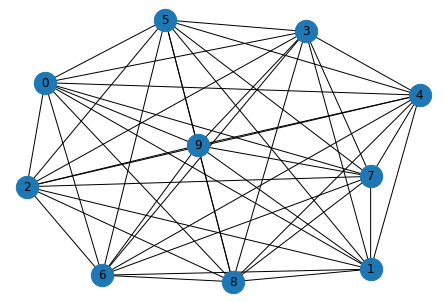

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


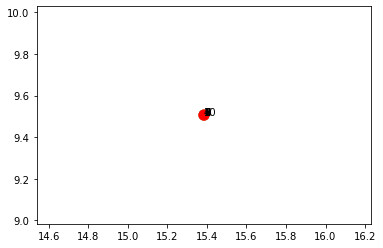

In [72]:

xf1,yf1 = mouvement(a1,b1,An_1)


#print(xf1.sum(axis=0)/n, yf1.sum(axis=0)/n)
print("\n")
print(xf1,yf1)

M = positionToAdjMatrix(xf1,yf1,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf1[0:], yf1[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf1[i-1], yf1[i-1]))

In [73]:
print(a1)

[20.0, 25.0, 0.0, 15.0, 30.0, 15.0, 5.0, 15.0, 25.0, 10.0]


In [74]:
Xpre2 = (a[0]*An_1[0]).sum(axis=0)
Ypre2 = (b[0]*An_1[0]).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre2)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre2)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 15.385498727289194

 Abscisse final de chaque agent :  
 [15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
 15.38549873 15.38549873 15.38549873 15.38549873]

Prédiction de l'ordonné final
 9.506386170026294

 Ordonné final de chaque agent :  
 [9.50638617 9.50638617 9.50638617 9.50638617 9.50638617 9.50638617
 9.50638617 9.50638617 9.50638617 9.50638617]


In [75]:
xf,yf = mouvement(a2,b2,An_1)


print("\n")
print(xf,yf)



[15.38549873 15.38549873 15.38549873 15.38549873 15.38549873 15.38549873
 15.38549873 15.38549873 15.38549873 15.38549873] [9.50638617 9.50638617 9.50638617 9.50638617 9.50638617 9.50638617
 9.50638617 9.50638617 9.50638617 9.50638617]


In [76]:
print(sum(xf)/n)

15.385498727289193


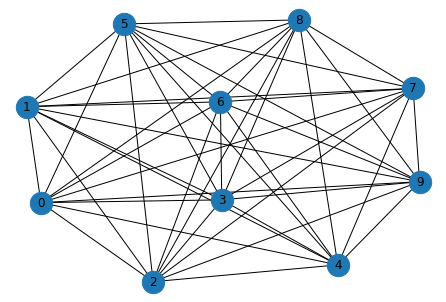

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


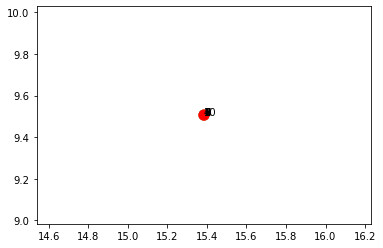

In [77]:
M = positionToAdjMatrix(xf,yf,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf[0:], yf[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf[i-1], yf[i-1]))


In [78]:
print(A1_n[0])

[0.10462737 0.10765865 0.12648802 0.10058762 0.08338263 0.08152877
 0.11564976 0.06366334 0.12834991 0.08806393]
